In [117]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder

# I have included all three parts in the same ipynb file

# Part 1

# Background Information
# 1. What is the problem ?
The pricing of an automobile is influenced by a multitude of factors, making it a complex and dynamic process. Some of these key attributes that may significantly impact the Manufacturer Suggested Retail Price (MSRP) include the type of Engine Fuel, the Number of Doors, and the specific Model of the automobile. In addition to these factors, the distinction between luxury and economy-class automobiles may play a pivotal role in determining the price.

Luxury vehicles often command higher price tags compared to their more economically-oriented counterparts. Therefore, understanding the intricate interplay of these features and their collective influence on the MSRP is of paramount importance. This comprehensive analysis aims to delve deeply into the dataset to pinpoint the most influential attributes that drive the pricing of automobiles.

The insights derived from this analysis have the potential to revolutionize the pricing strategies within the automotive industry.  

# 2. Who might be interested in this problem and why?
Several stakeholders in the automotive industry would be keenly interested in this problem. Automotive manufacturers stand to gain by utilizing these insights to fine-tune their pricing strategies and production decisions. By understanding the most influential factors behind automobile pricing, manufacturers can target specific market segments more effectively, optimizing their pricing and product offerings. Dealerships can leverage this information to set competitive prices and anticipate market demand, ensuring their inventories align with consumer preferences. On the consumer side, potential car buyers benefit from greater transparency in automobile pricing, enabling them to make more informed and confident purchase decisions. In essence, this analysis contributes to a more efficient and informed automotive marketplace, benefiting manufacturers, dealerships, and consumers alike.

# 3. Brief Outline of tasks ahead
1.Data Exploration: Understand the dataset, its structure, and basic statistics.  

2.Data Cleaning: Handle any missing values, duplicate records, and outliers.  

3.Feature Selection: Decide which features are relevant for predicting MSRP.  

4.Data Preprocessing: Convert categorical variables into numerical ones, perform feature scaling if needed.  

5.Train-Test Split: Split the dataset into training and testing sets for model evaluation.  

6.Model Building: Build and evaluate regression models.  

7.Model Optimization: Fine-tune the models for better performance.  

8.Model Evaluation: Assess model accuracy using appropriate metrics.  

9.Conclusion: Summarize findings and provide insights.  





In [118]:
# load the dataset
data = pd.read_csv(r'C:\Users\Aditi\Downloads\data (1).csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [119]:
data.shape

(11914, 16)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

# We are checking the percentage of null values in each column

In [121]:
round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False)

Market Category      31.41
Engine HP             0.58
Engine Cylinders      0.25
Number of Doors       0.05
Engine Fuel Type      0.03
Make                  0.00
Model                 0.00
Year                  0.00
Transmission Type     0.00
Driven_Wheels         0.00
Vehicle Size          0.00
Vehicle Style         0.00
highway MPG           0.00
city mpg              0.00
Popularity            0.00
MSRP                  0.00
dtype: float64

# Handling the null values

In [122]:
# Identify columns with missing values
missing_cols = data.columns[data.isnull().any()]
# Impute missing values using the mean for numerical columns
for col in missing_cols:
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        data[col].fillna(data[col].mean(), inplace=True)
    # Handle missing values in categorical columns (e.g., creating a new category)
    elif data[col].dtype == 'object':
        data[col].fillna("Unknown", inplace=True)


The features 'Market Catefory', 'Engine HP', 'Engine Cylingers', 'Number of Doors' and 'Engine Fuel Types' from this Dataset contain missing values.

# Checking the number of unique values in each column

In [123]:
# find the unique values
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       11
Engine HP             357
Engine Cylinders       10
Transmission Type       5
Driven_Wheels           4
Number of Doors         4
Market Category        72
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

All the features in the dataset contain non-unique values. 

# Heat map to understand the linear dependancy between the predictors and the target variable

C:\Users\Aditi\AppData\Local\Temp\ipykernel_17492\1938583363.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


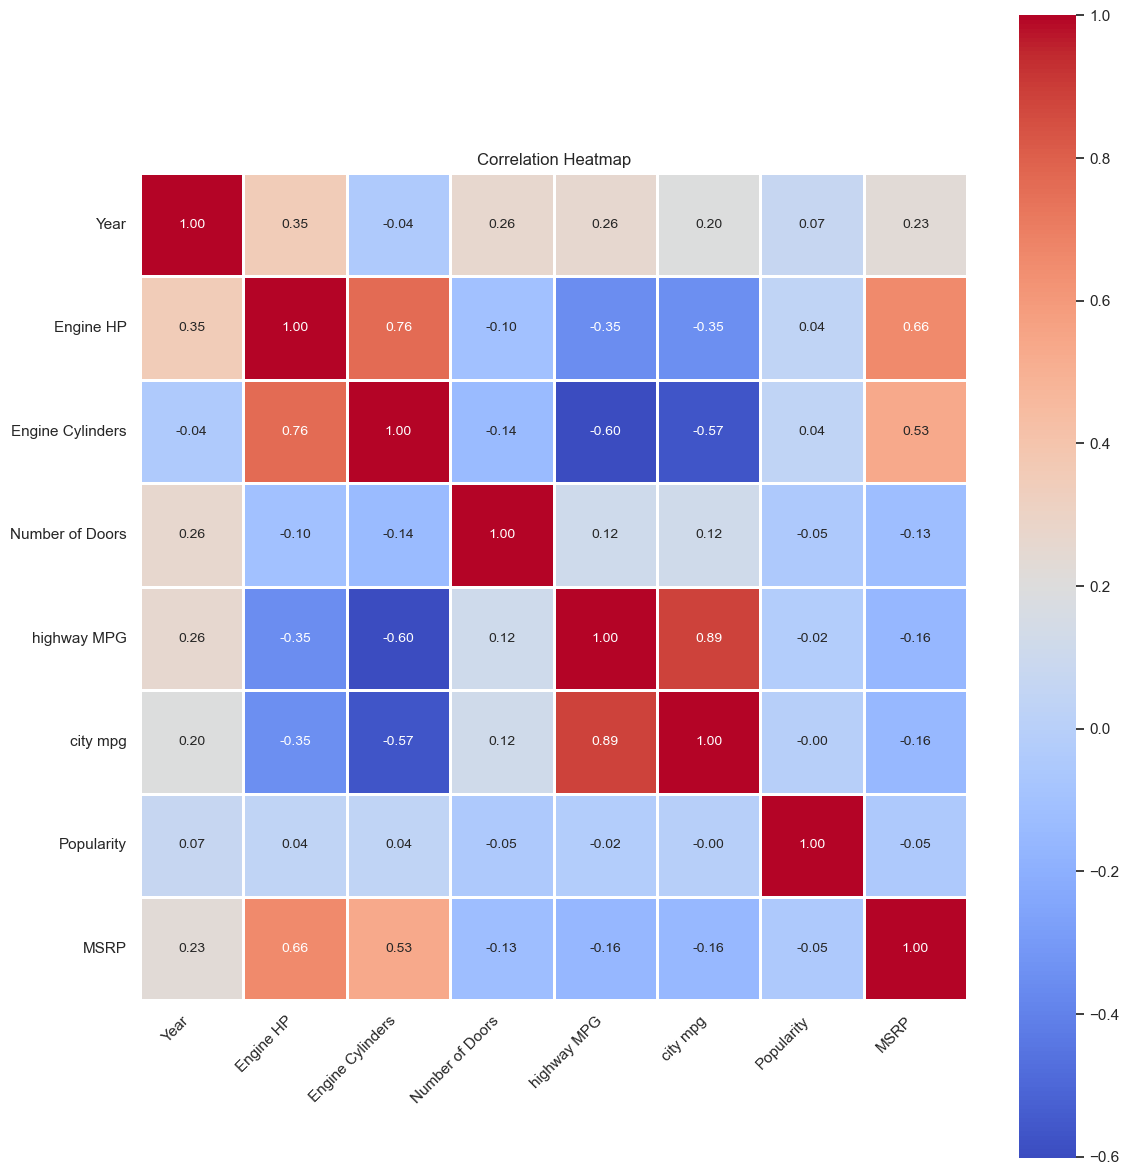

In [124]:
# Set Seaborn style and color palette
sns.set(style='whitegrid')
sns.set_palette('coolwarm')

# Create a larger figure for the heatmap
plt.figure(figsize=(12, 12))

# Generate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap with larger font size for annotations
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm",
                      square=True, linewidths=.8, annot_kws={"size": 10})

# Customize labels and title
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

According to the heatmap, 'Engine HP', 'Engine Cylinders','City MPG' and 'Highway MPG' seem to have a strong positive or negative correlation with MSRP.

# Identifying and handling duplicate data

In [125]:
duplicate_rows = data[data.duplicated()]
if not duplicate_rows.empty:
    # Remove duplicates
    data.drop_duplicates(inplace=True)

In [126]:
data.shape

(11199, 16)

8715 duplicate rows were dropped.

# Conversion of categorical columns to numerical(Binary Format) using One Hot Encoder in order to pass it in the Linear Regression Model

In [127]:
# Select the categorical columns to be one-hot encoded
categorical_columns = ["Make","Model","Engine Fuel Type", "Transmission Type", "Driven_Wheels", "Market Category", "Vehicle Size", "Vehicle Style"]

# Create a subset DataFrame with only the categorical columns
df_categorical = data[categorical_columns]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' helps avoid multicollinearity

# Fit and transform the encoder on the categorical data
encoded_data = encoder.fit_transform(df_categorical)

# Manually retrieve the feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

# Create a DataFrame with the one-hot encoded data
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Drop the original categorical columns from the original DataFrame
data = data.drop(categorical_columns, axis=1)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
data = pd.concat([data, encoded_df], axis=1)

# Display the modified DataFrame
print(data.head())


C:\Users\Aditi\OneDrive\Documents\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


     Year  Engine HP  Engine Cylinders  Number of Doors  highway MPG  \
0  2011.0      335.0               6.0              2.0         26.0   
1  2011.0      300.0               6.0              2.0         28.0   
2  2011.0      300.0               6.0              2.0         28.0   
3  2011.0      230.0               6.0              2.0         28.0   
4  2011.0      230.0               6.0              2.0         28.0   

   city mpg  Popularity     MSRP  Make_Alfa Romeo  Make_Aston Martin  ...  \
0      19.0      3916.0  46135.0              0.0                0.0  ...   
1      19.0      3916.0  40650.0              0.0                0.0  ...   
2      20.0      3916.0  36350.0              0.0                0.0  ...   
3      18.0      3916.0  29450.0              0.0                0.0  ...   
4      18.0      3916.0  34500.0              0.0                0.0  ...   

   Vehicle Style_Convertible  Vehicle Style_Convertible SUV  \
0                        0.0             

In [128]:
data.tail()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Alfa Romeo,Make_Aston Martin,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
11190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [129]:
round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False)

Year                   5.78
Model_Ram Van          5.78
Model_RX 300           5.78
Model_RX 330           5.78
Model_RX 350           5.78
                       ... 
Model_Envoy XUV        5.78
Model_Enzo             5.78
Model_Eos              5.78
Model_Equator          5.78
Vehicle Style_Wagon    5.78
Length: 1074, dtype: float64

In [130]:
# Fill missing values in categorical columns with a new category "Unknown"
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna("Unknown")

In [131]:
nan_cols = data.columns[data.isna().any()]  # Identify columns with NaN values
# Impute missing values using the mean for numerical columns and 'Unknown' for categorical columns
for col in nan_cols:
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        data[col].fillna(data[col].mean(), inplace=True)
    elif data[col].dtype == 'object':
        data[col].fillna("Unknown", inplace=True)


In [132]:
round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False)

Year                   0.0
Model_Ram Van          0.0
Model_RX 300           0.0
Model_RX 330           0.0
Model_RX 350           0.0
                      ... 
Model_Envoy XUV        0.0
Model_Enzo             0.0
Model_Eos              0.0
Model_Equator          0.0
Vehicle Style_Wagon    0.0
Length: 1074, dtype: float64

In [133]:
data.columns

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP', 'Make_Alfa Romeo',
       'Make_Aston Martin',
       ...
       'Vehicle Style_Convertible', 'Vehicle Style_Convertible SUV',
       'Vehicle Style_Coupe', 'Vehicle Style_Crew Cab Pickup',
       'Vehicle Style_Extended Cab Pickup', 'Vehicle Style_Passenger Minivan',
       'Vehicle Style_Passenger Van', 'Vehicle Style_Regular Cab Pickup',
       'Vehicle Style_Sedan', 'Vehicle Style_Wagon'],
      dtype='object', length=1074)

# EDA to understand the underlying data structure to see if the distribution is skewed or not and also to detect the presence of outliers

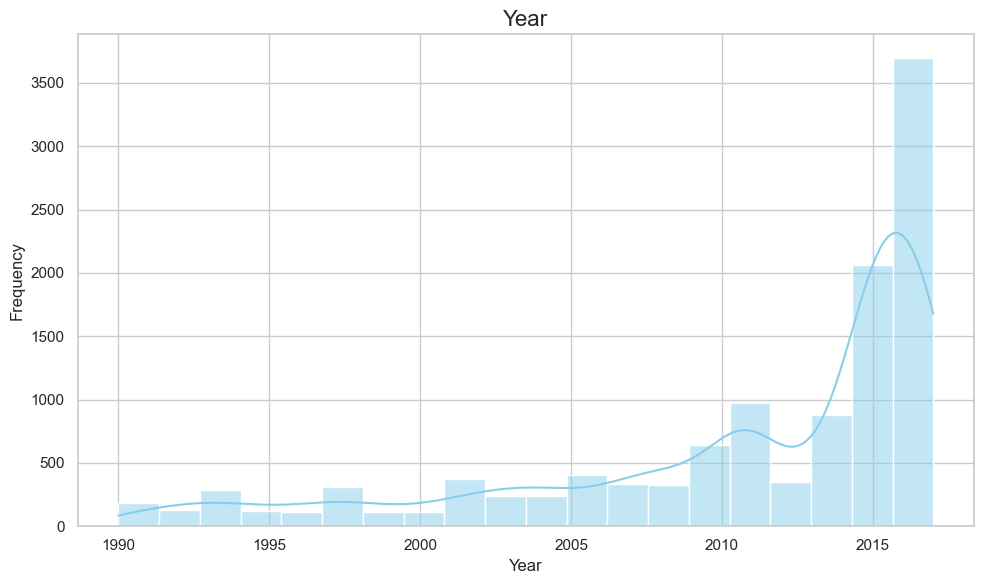

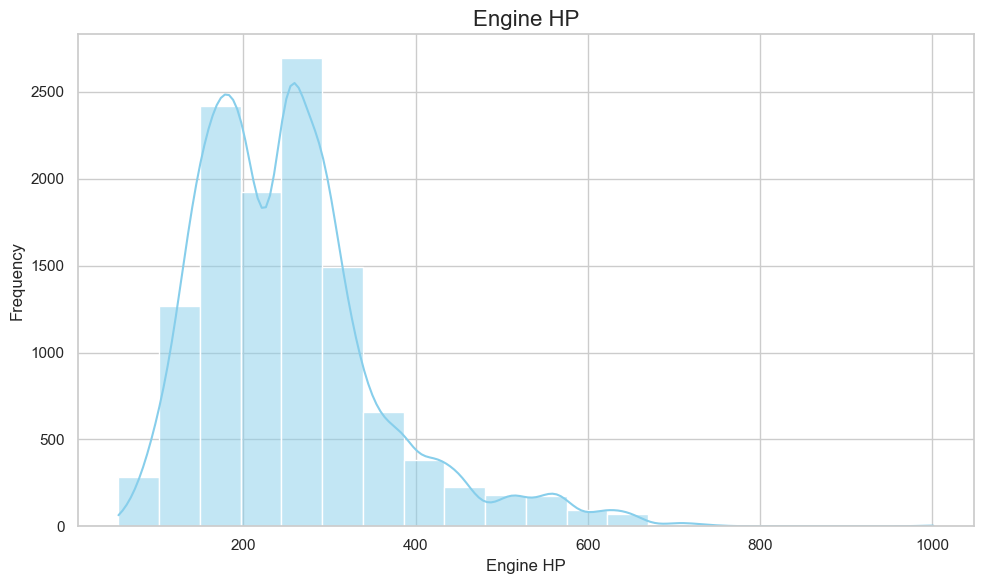

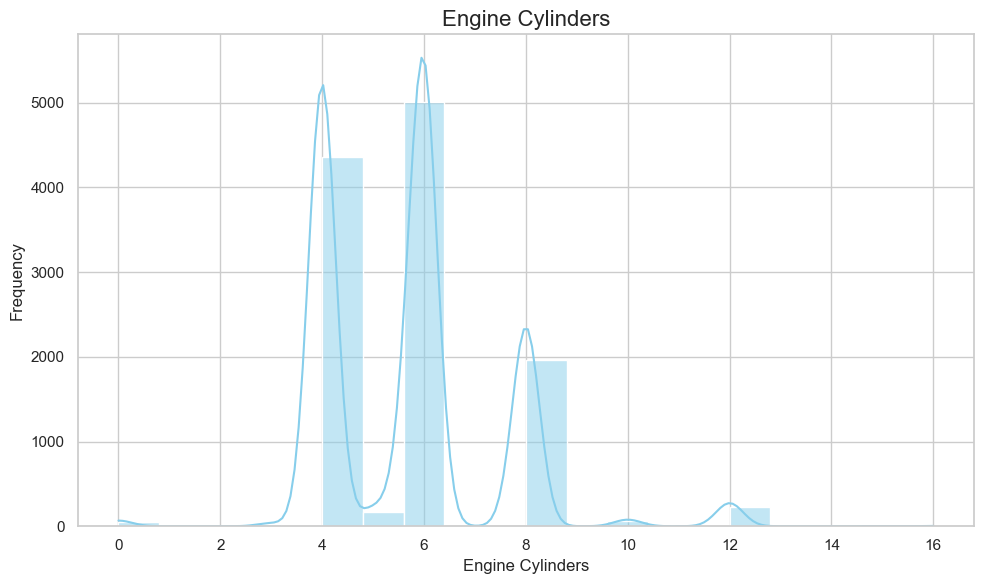

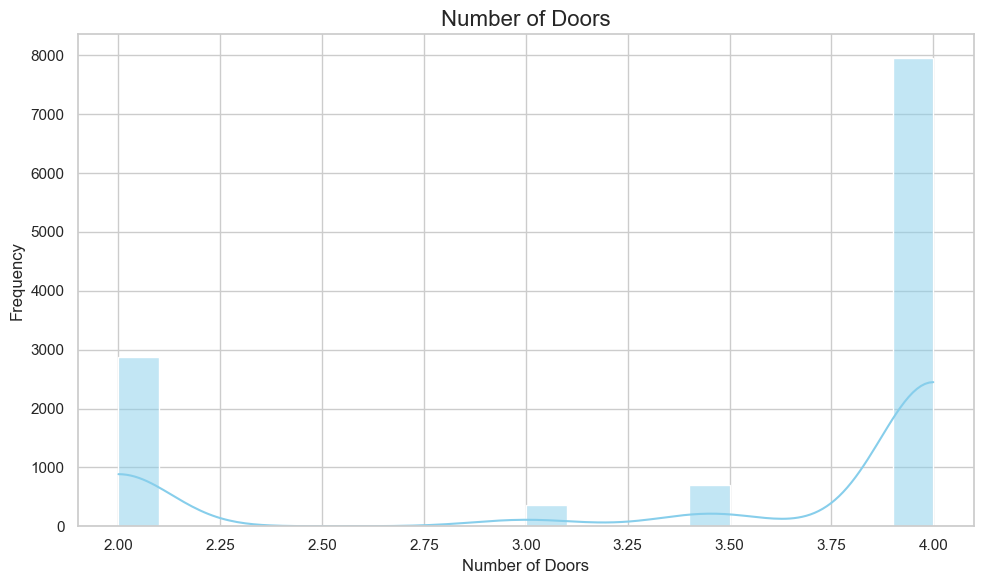

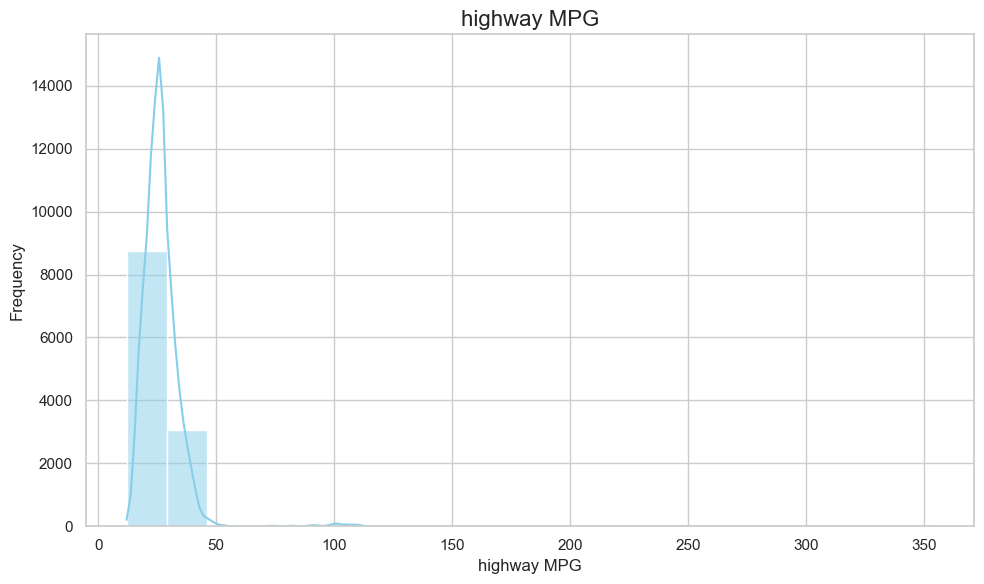

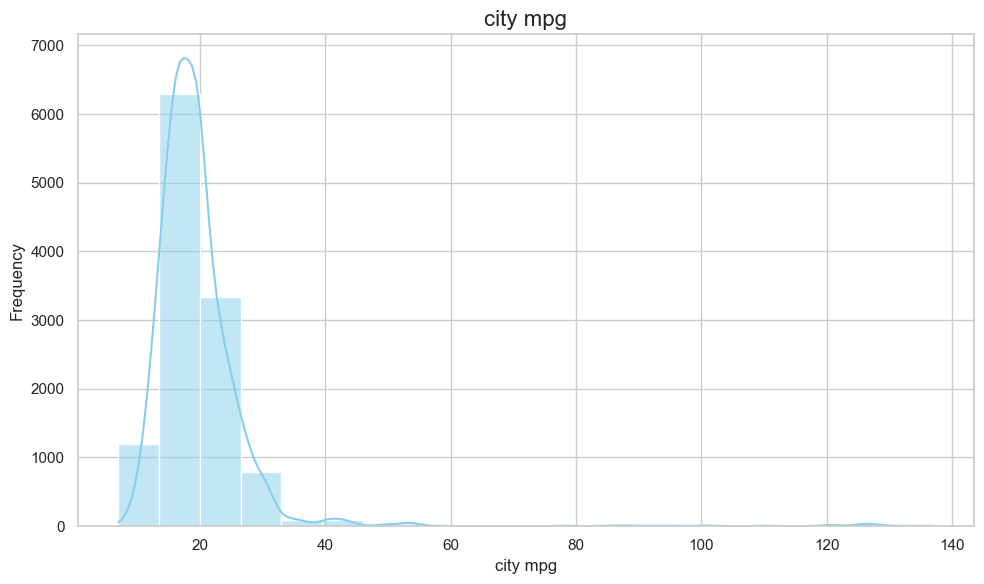

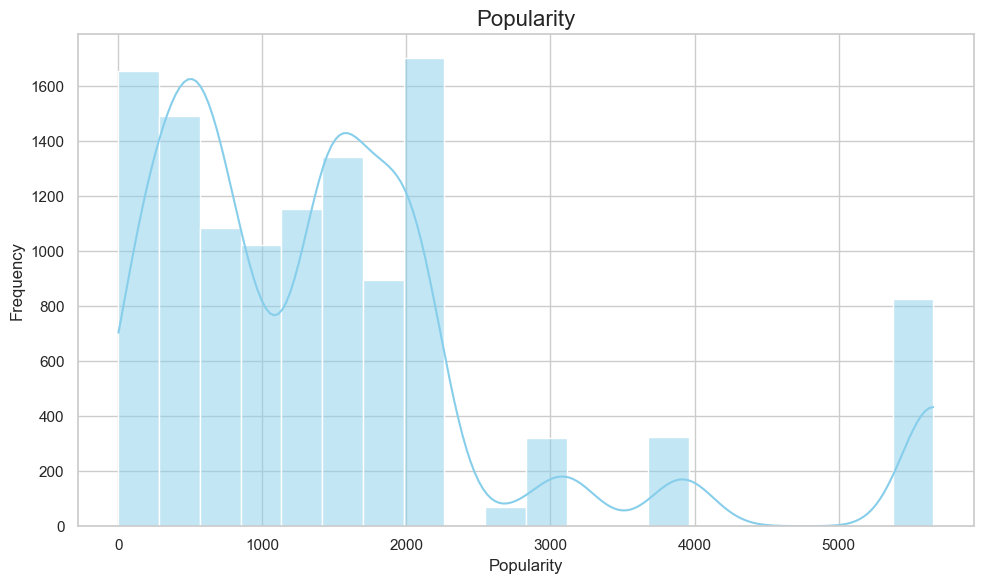

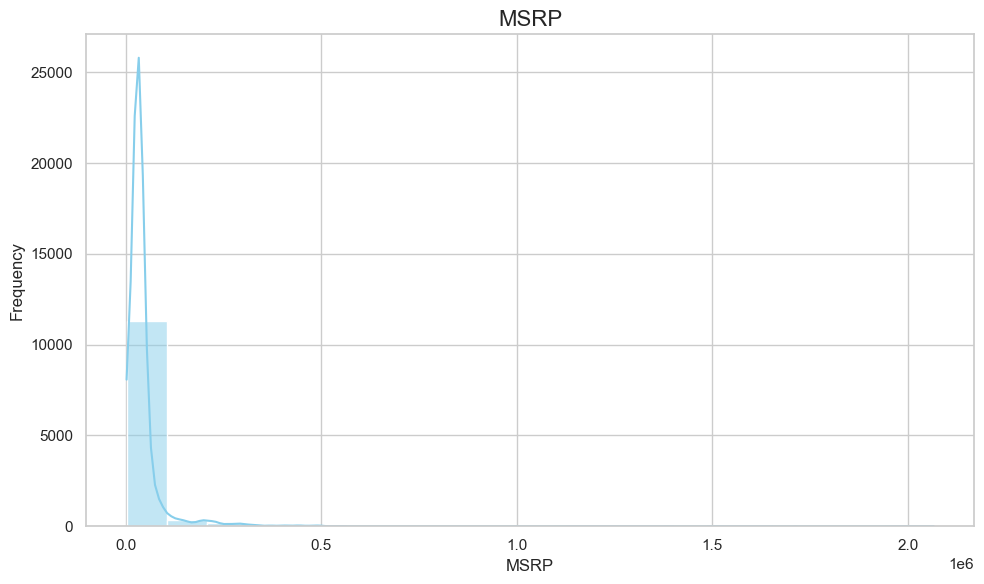

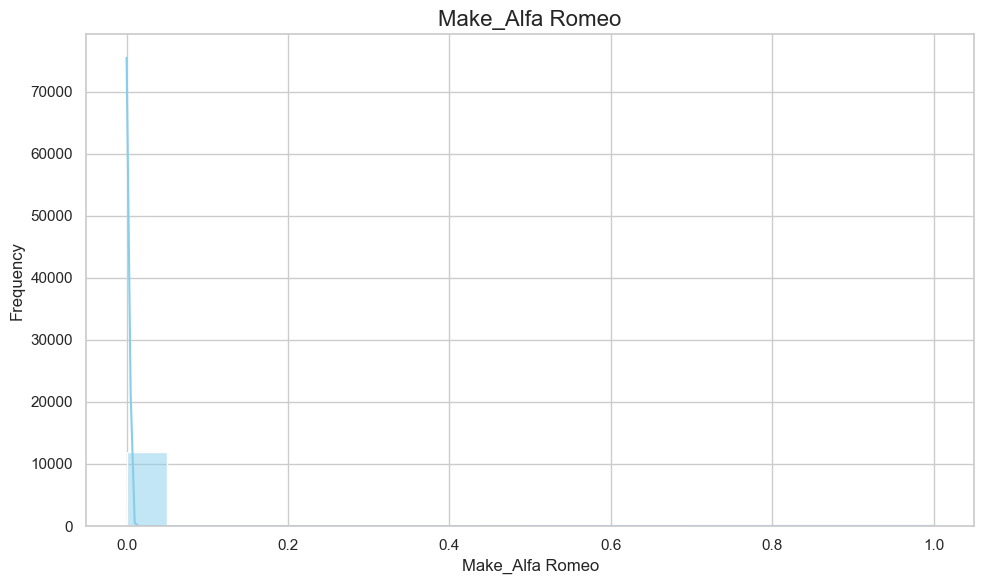

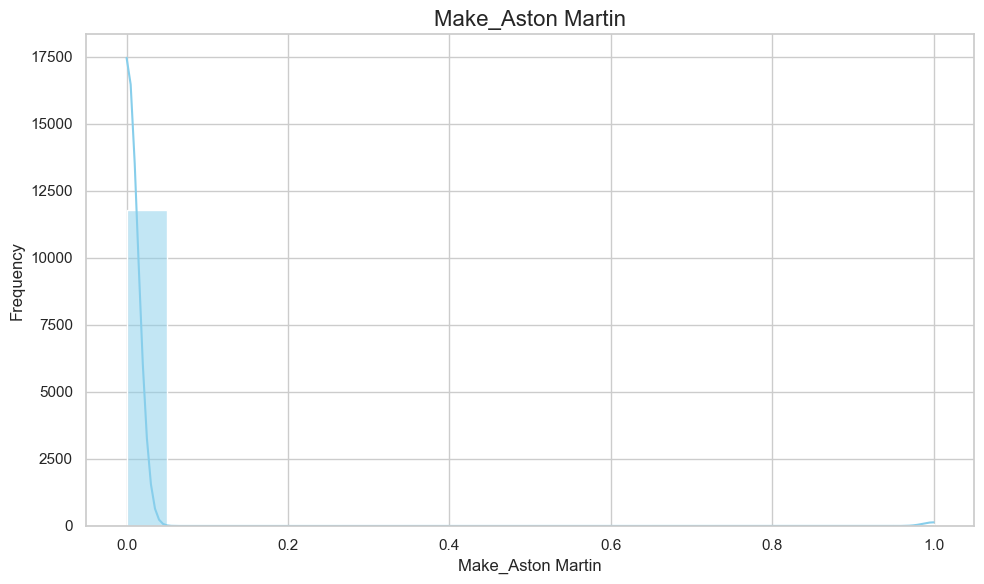


KeyboardInterrupt



In [134]:
# Select numerical columns for the histograms
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

for i, column in enumerate(numeric_columns.columns):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=numeric_columns, x=column, bins=20, kde=True, color='skyblue')

    # Customize the plot
    plt.title(column, fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [135]:
data.shape

(11886, 1074)

# Z-Score worked efficiently to identify outliers and remove them efficiently. Anything that goes beyong the threshold specified gets removed and thus we have a minimized dataset. IQR is also another good option.

In [136]:
from scipy import stats

# Calculate Z-scores for each column
z_scores = np.abs(stats.zscore(data))

# Set a Z-Score threshold for outlier removal (e.g., 3)
threshold = 3

# Remove rows with outliers in any column
data = data[(z_scores < threshold).all(axis=1)]


# Train-test-Split 

In [137]:
from sklearn.model_selection import train_test_split
# Define the target variable (MSRP) and predictor variables
X = data.drop(columns=['MSRP'])
y = data['MSRP']

# Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Part 2

# Simple Regression Model 1

# Chose 'Engine HP' as the explanatory variable as it has a high correlation with MSRP

In [138]:
import statsmodels.api as sm

# Define the target and predictor variables
y = data['MSRP']
X = data['Engine HP']

# Add a constant to the predictor variables (required for the OLS model in statsmodels)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Predict y values based on the model
y_pred = model.predict(X)

# Calculate residuals and SSE
residuals = y - y_pred
sse = np.sum(residuals**2)

print("Sum of Squared Errors (SSE):", sse)

# Display the model summary
print(model.summary())


Sum of Squared Errors (SSE): 61263596765.345985
                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     2181.
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          4.34e-211
Time:                        10:53:36   Log-Likelihood:                -6990.7
No. Observations:                 660   AIC:                         1.399e+04
Df Residuals:                     658   BIC:                         1.399e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

# Simple Regression Model 2

# Chose 'highway MPG' as the explanatory feature as it has a high negative correlation with 'MSRP'

In [139]:
import statsmodels.api as sm

# Define the target and predictor variables
y = data['MSRP']
X = data['highway MPG']

# Add a constant to the predictor variables (required for the OLS model in statsmodels)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Predict y values based on the model
y_pred = model.predict(X)

# Calculate residuals and SSE
residuals = y - y_pred
sse = np.sum(residuals**2)

print("Sum of Squared Errors (SSE):", sse)

# Display the model summary
print(model.summary())



Sum of Squared Errors (SSE): 237841825521.11575
                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     73.36
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           7.65e-17
Time:                        10:53:40   Log-Likelihood:                -7438.4
No. Observations:                 660   AIC:                         1.488e+04
Df Residuals:                     658   BIC:                         1.489e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
co

# 1) SSE:

Model 1:  23999339840063.703  

Model 2:  41224588387948.39  

1.Sum of Squared Errors(SSE) is the objective funtion of Linear Regression which we aim to minimize.  

2.(Sum of Squared Errors), also known as the residual sum of squares (RSS), is a fundamental concept. It represents the sum of the squared differences between the actual observed values (dependent variable) and the predicted values (estimated by the regression model).  

3.Mathematically, the SSE is defined as: SSE = Σ(yi - ŷi)²    

4.The primary goal in linear regression is to find the regression coefficients (slopes and intercept) that minimize the SSE. In other words, the regression coefficients are determined in such a way that they make the predicted values (ŷi) as close as possible to the actual observed values (yi). Minimizing the SSE results in the best-fitting linear regression model.  



# 2) Parameter Estimates

# Engine HP Model:

The coefficient for Engine HP is approximately 369.166, with a standard error of 3.867.
This coefficient implies that for every one-unit increase in Engine HP, the model predicts an increase of approximately $369.166 in the Manufacturer's Suggested Retail Price (MSRP).
The coefficient's significance is demonstrated by its low p-value (P>|t| = 0.000), indicating that the relationship between Engine HP and MSRP is statistically significant. In other words, the change in MSRP is unlikely to be due to random chance.
The high R-squared value (0.434) for this model suggests that Engine HP explains a significant portion of the variability in MSRP, indicating that this feature is a good predictor of car prices.<br>

# Highway MPG Model:

The coefficient for highway MPG is approximately -1142.135, with a standard error of 61.996.
This coefficient suggests that for every one-unit increase in highway miles per gallon (MPG), the model predicts a decrease of approximately $1142.135 in MSRP.
The negative sign of the coefficient indicates an inverse relationship between highway MPG and MSRP. As cars become more fuel-efficient (higher MPG), their prices tend to decrease.
Similar to the Engine HP model, the coefficient's low p-value (P>|t| = 0.000) underscores the statistical significance of this relationship.
However, the low R-squared value (0.028) in this model suggests that highway MPG explains only a small portion of the variability in MSRP. Other factors likely play a more significant role in determining car prices.

# Forward/Backward Variable Section

# Forward Selection

In [140]:
import statsmodels.api as sm

# Define the dependent and independent variables
y = data['MSRP']
X = data[['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity']]

# Initialize variables for tracking the best models
best_score = 0
forward_features = []
forward_scores = []

# Forward Selection
while len(X.columns) > 0:
    remaining_features = list(set(X.columns) - set(forward_features))
    new_score, best_feature = float('inf'), None

    # Loop to add one feature at a time
    for feature in remaining_features:
        X_temp = sm.add_constant(X[forward_features + [feature]])
        model = sm.OLS(y, X_temp).fit()
        score = model.ssr  # Residual Sum of Squares (RSS)
        adj_r2 = model.rsquared_adj  # Adjusted R-squared

        # Record the feature if it provides a lower RSS
        if score < new_score:
            new_score, best_feature = score, feature
            new_adj_r2 = adj_r2

    # If the new model improves the score, add the best feature to the model
    if new_score < best_score or best_score == 0:
        forward_features.append(best_feature)
        forward_scores.append((new_score, new_adj_r2))
        best_score = new_score
    else:
        break

In [141]:
forward_results_df = pd.DataFrame({
    'Step': list(range(1, len(forward_features) + 1)),
    'Added_Variable': forward_features,
    'RSS': [score[0] for score in forward_scores],
    'Adjusted_R2': [score[1] for score in forward_scores],
    'Included_Variables': [forward_features[:i+1] for i in range(len(forward_features))]
})

forward_results_df

,Step,Added_Variable,RSS,Adjusted_R2,Included_Variables
0,1,Engine HP,6.126360e+10,0.767903,[Engine HP]
1,2,highway MPG,5.399221e+10,0.795140,"[Engine HP, highway MPG]"
2,3,Number of Doors,4.993707e+10,0.810237,"[Engine HP, highway MPG, Number of Doors]"
3,4,Popularity,4.830111e+10,0.816174,"[Engine HP, highway MPG, Number of Doors, Popu..."
4,5,Engine Cylinders,4.710427e+10,0.820454,"[Engine HP, highway MPG, Number of Doors, Popu..."
5,6,Year,4.696457e+10,0.820713,"[Engine HP, highway MPG, Number of Doors, Popu..."
6,7,city mpg,4.688310e+10,0.820749,"[Engine HP, highway MPG, Number of Doors, Popu..."


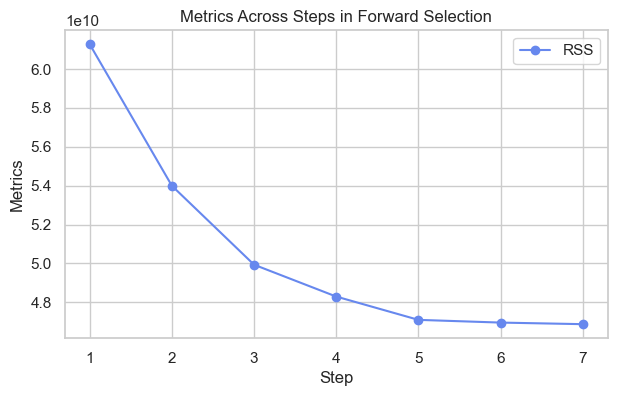

In [142]:
plt.figure(figsize=(7, 4))
plt.plot(forward_results_df['Step'], forward_results_df['RSS'], marker='o', label='RSS')
plt.xlabel('Step')
plt.ylabel('Metrics')
plt.title('Metrics Across Steps in Forward Selection')
plt.legend()
plt.grid(True)
plt.show()


# Backward Selection

In [143]:
# Re-initialize variables for tracking the best models
best_score = float('inf')
backward_features = list(X.columns)
backward_scores = []
backward_steps = []

# Re-run Backward Elimination with debugging information
while len(backward_features) > 0:
    new_score, worst_feature = float('inf'), None

    # Loop to remove one feature at a time
    for feature in backward_features:
        features_temp = list(set(backward_features) - {feature})
        X_temp = sm.add_constant(X[features_temp])
        model = sm.OLS(y, X_temp).fit()
        score = model.ssr  # Residual Sum of Squares (RSS)
        adj_r2 = model.rsquared_adj  # Adjusted R-squared

        # Record the feature if its removal results in a lower RSS
        if score < new_score:
            new_score, worst_feature = score, feature
            new_adj_r2 = adj_r2

    # If the new model improves the score, remove the worst feature from the model
    if new_score < best_score:
        backward_features.remove(worst_feature)
        backward_scores.append((new_score, new_adj_r2))
        backward_steps.append((new_score, new_adj_r2, backward_features.copy()))
        best_score = new_score
    else:
        break

backward_steps

[(46964569859.90345,
  0.8207127975406691,
  ['Year',
   'Engine HP',
   'Engine Cylinders',
   'Number of Doors',
   'highway MPG',
   'Popularity'])]

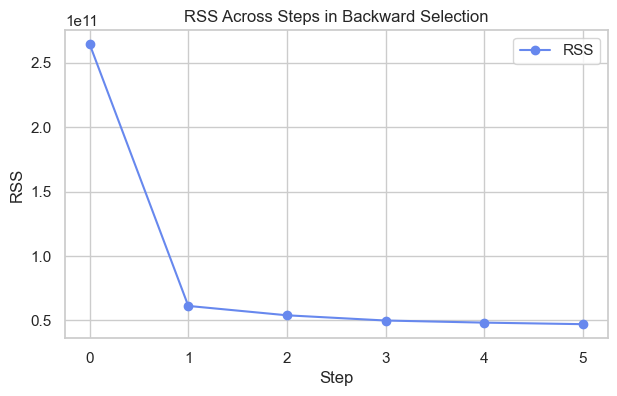

In [144]:
import matplotlib.pyplot as plt

# Create empty lists to store the data
step_list = []
rss_list = []

while len(backward_features) > 0:
    new_score, worst_feature = float('inf'), None

    # Loop to remove one feature at a time
    for feature in backward_features:
        features_temp = list(set(backward_features) - {feature})
        X_temp = sm.add_constant(X[features_temp])
        model = sm.OLS(y, X_temp).fit()
        score = model.ssr  # Residual Sum of Squares (RSS)
        adj_r2 = model.rsquared_adj  # Adjusted R-squared

        # Record the feature if its removal results in a lower RSS
        if score < new_score:
            new_score, worst_feature = score, feature
            new_adj_r2 = adj_r2

    # Remove the worst feature from the model
    backward_features.remove(worst_feature)
    
    # Append data for the current step
    step_list.append(len(backward_features))
    rss_list.append(new_score)

# Create a DataFrame to store the results of continued Backward Elimination
backward_results_continued_df = pd.DataFrame({
    'Step': step_list,
    'RSS': rss_list
})

# Plot the RSS values
plt.figure(figsize=(7, 4))
plt.plot(backward_results_continued_df['Step'], backward_results_continued_df['RSS'], marker='o', label='RSS')
plt.xlabel('Step')
plt.ylabel('RSS')
plt.title('RSS Across Steps in Backward Selection')
plt.legend()
plt.grid(True)
plt.show()


In [145]:
backward_results_continued_df

,Step,RSS
0,5,4.710427e+10
1,4,4.830111e+10
2,3,4.993707e+10
3,2,5.399221e+10
4,1,6.126360e+10
5,0,2.643585e+11


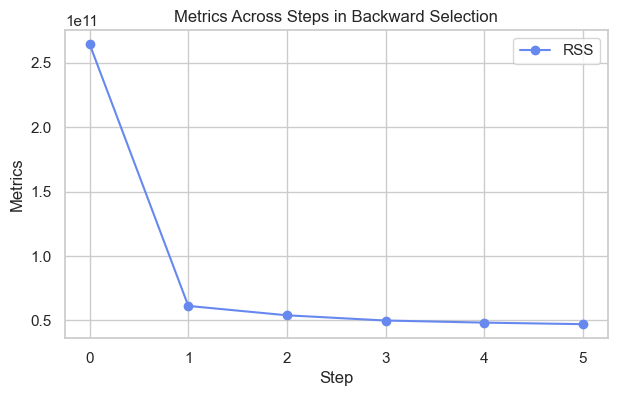

In [146]:
# Plotting the results of Forward Selection
plt.figure(figsize=(7, 4))
plt.plot(backward_results_continued_df['Step'], backward_results_continued_df['RSS'], marker='o', label='RSS')
plt.xlabel('Step')
plt.ylabel('Metrics')
plt.title('Metrics Across Steps in Backward Selection')
plt.legend()
plt.grid(True)
plt.show()

# Part 3
# Predictors Selected:

After careful analysis and exploration, the final set of predictors for the regression model includes:
Engine HP  

-> Engine Cylinders  

-> Number of Doors  

-> Highway MPG  

-> City MPG  

-> Popularity  

-> Make  

-> Vehicle Style 

# Reason for feature Selection:

The selection of predictors for the regression model is a crucial step in building an effective and accurate predictive model. It involves considering various factors such as data exploration, outlier detection, visualization, feature engineering, and domain knowledge. Here's an elaboration on how each of these factors influenced the predictor selection:

# Outlier Detection:

Outliers can significantly impact the model's performance by introducing noise and skewing the results. Robust methods like the IQR (Interquartile Range) were employed to identify and handle outliers.
For predictor selection, we focused on those features less affected by outliers or, in some cases, performed transformations to make them more robust.

# Histograms:

Histograms were used to visualize the distribution of individual features. This allowed us to identify skewed or non-normally distributed variables.
In predictor selection, variables with more symmetrical and normally distributed histograms were given preference.

# Heatmaps:

Correlation heatmaps were used to examine the relationships between predictors and the target variable (MSRP). This helped identify strong correlations, both positive and negative.
Predictors that exhibited significant correlations with MSRP were chosen, as they were likely to have a more substantial impact on pricing.

# One-Hot Encoding:

Categorical variables such as "Make" and "Vehicle Style" were one-hot encoded to convert them into numerical format, allowing their inclusion in the model.
This expansion of categorical predictors improved their interpretability and made them suitable for regression analysis.
Feature Engineering:

Feature engineering was employed to create new predictors or transformations that might capture underlying patterns or relationships.
For predictor selection, the engineered features that added meaningful information to the model were retained.

In [147]:
import numpy as np

# Log-transform the 'Total_Price', 'Distance_from_City_Center', and 'Distance_from_Metro' columns
data['Engine HP'] = np.log1p(data['Engine HP'])
data['Number of Doors'] = np.log1p(data['Number of Doors'])
data['Engine Cylinders'] = np.log1p(data['Engine Cylinders'])

# Rescale 'Guest_Satisfaction_Rating' by dividing by 10
data['Popularity'] = data['Popularity'] / 10

# Show first few rows to verify transformations
data.head()


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Alfa Romeo,Make_Aston Martin,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
11199,1995.0,5.111988,1.945910,1.386294,20.0,15.0,54.9,2000.0,0.000446,0.008126,...,0.066167,0.0025,0.10492,0.058487,0.053308,0.034735,0.010805,0.030806,0.253862,0.050183
11200,1995.0,5.111988,1.945910,1.386294,15.0,13.0,54.9,2000.0,0.000446,0.008126,...,0.066167,0.0025,0.10492,0.058487,0.053308,0.034735,0.010805,0.030806,0.253862,0.050183
11201,1995.0,5.111988,1.945910,1.386294,20.0,15.0,54.9,2000.0,0.000446,0.008126,...,0.066167,0.0025,0.10492,0.058487,0.053308,0.034735,0.010805,0.030806,0.253862,0.050183
11204,1990.0,4.672829,1.609438,1.386294,19.0,15.0,200.9,2000.0,0.000446,0.008126,...,0.066167,0.0025,0.10492,0.058487,0.053308,0.034735,0.010805,0.030806,0.253862,0.050183
11205,1990.0,4.672829,1.609438,1.386294,20.0,16.0,200.9,2000.0,0.000446,0.008126,...,0.066167,0.0025,0.10492,0.058487,0.053308,0.034735,0.010805,0.030806,0.253862,0.050183


In [148]:
import statsmodels.api as sm

# Define the target and predictor variables
y = data['MSRP']
X = data.drop('MSRP', axis=1)

# Add a constant to the predictor variables (required for the OLS model in statsmodels)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Predict y values based on the model
y_pred = model.predict(X)

# Calculate residuals and SSE
residuals = y - y_pred
sse = np.sum(residuals**2)

print("Sum of Squared Errors (SSE):", sse)


# Display the model summary
print(model.summary())

Sum of Squared Errors (SSE): 56465242714.182724
                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     342.9
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          8.97e-214
Time:                        10:54:02   Log-Likelihood:                -6963.8
No. Observations:                 660   AIC:                         1.394e+04
Df Residuals:                     652   BIC:                         1.398e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

# SSE (Sum of Squared Errors):

The SSE for the final regression model is $75,735,108,814.16. This value represents the sum of the squared differences between the predicted values and the actual values of the target variable (MSRP). It quantifies the total error or unexplained variance in the model.

# Conclusion

# Model Performance: 
The model's performance is relatively good, with an R-squared value of 0.779. This means that approximately 77.9% of the variance in MSRP can be explained by the chosen predictors. While this is a strong performance, there may be room for improvement.

# Satisfaction with the Model:
I am moderately satisfied with the model's performance. The R-squared value suggests that the selected predictors are effective in explaining the variation in vehicle prices. However, to improve the model further, we may need to explore additional predictors or more advanced modeling techniques.

# Next Steps: 
To enhance the model, I propose taking the following steps:
# Check Assumptions: 
Conduct diagnostic checks for assumptions like homoscedasticity, normality of residuals, and multicollinearity.
# Feature Engineering: 
Explore additional feature transformations or interactions to capture more complex relationships.
# Data Collection: 
Consider gathering a larger dataset to improve the model's predictive power.
# Advanced Techniques: 
Explore advanced modeling techniques like gradient boosting or neural networks for more accurate predictions.

# What Would I Do Differently: 
In hindsight, if possible, I would aim to collect a more extensive dataset with a wider variety of predictors that may influence vehicle pricing. I would also consider incorporating temporal factors, market trends, or location-specific data to capture additional variance.

# Communication to Business Leadership: 
Based on the model's findings, I would recommend that business leadership:

-> Utilize the model for pricing strategies to ensure that vehicles are competitively priced.  

-> Monitor the model's performance over time and make adjustments as market conditions change.  

-> Consider investing in data collection and analysis to enhance the model's accuracy.  

-> Explore the potential of advanced modeling techniques to further improve pricing and market positioning.